In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


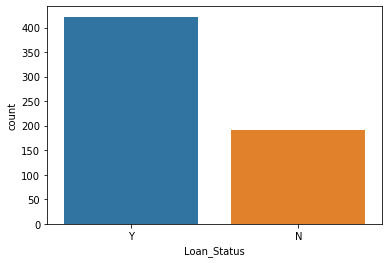

In [7]:
sns.countplot(x='Loan_Status',data=df)

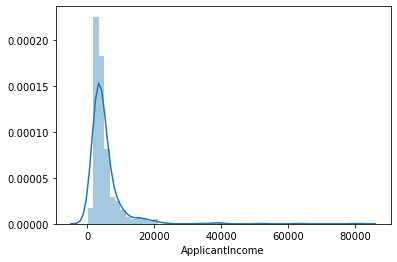

In [8]:
#applicant income is slightly right skew
sns.distplot(df["ApplicantIncome"])

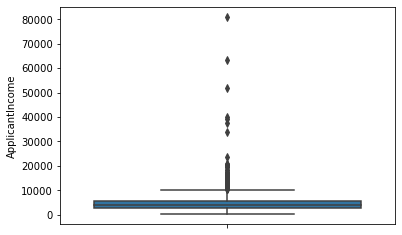

In [9]:
#boxplot confirms there is outliers in applicant income
sns.boxplot(y=df["ApplicantIncome"])

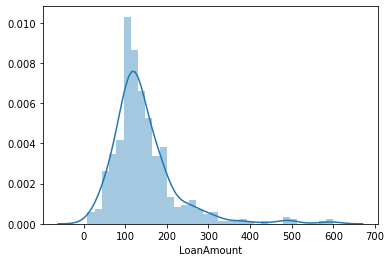

In [10]:
#loanamount is fairly normal distribution but slightly right skewed
df1=df.dropna()
sns.distplot(df1['LoanAmount'])

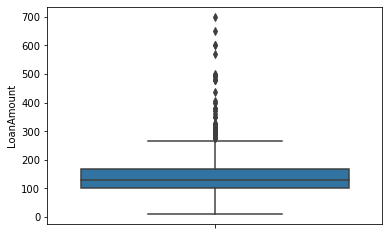

In [11]:
# In loanamount outliers exists
sns.boxplot(y=df["LoanAmount"])

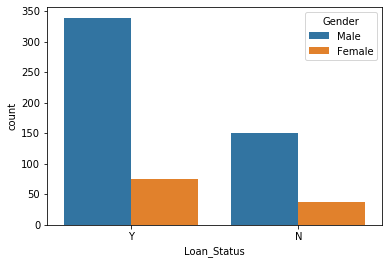

In [12]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)

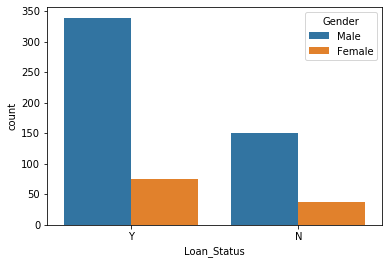

In [13]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)

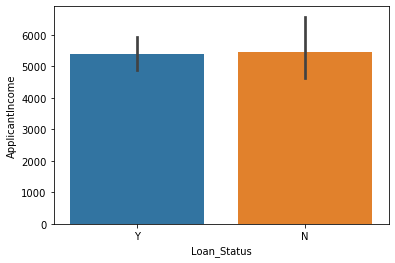

In [14]:
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=df)

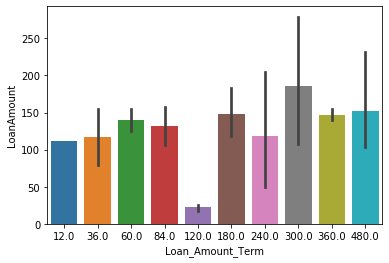

In [15]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)

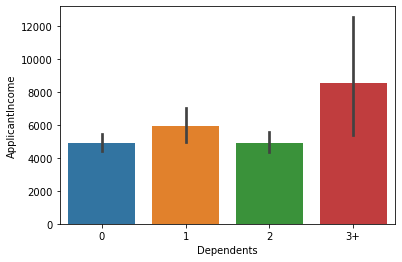

In [16]:
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)

In [53]:
pip to install lightgbm

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "to"



In [17]:
#for catergorical varaiables imputation using mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [21]:
#replace missing values with the median value due to outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.drop('Loan_ID',axis=1,inplace=True)

In [24]:
x=df.drop(columns=["Loan_Status"])
x.head(3)
#x.shape

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban


In [25]:
y=df[["Loan_Status"]]
y.head(2)
y.shape

(614, 1)

In [26]:
x.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [27]:
for index in x.skew().index:
    if x.skew().loc[index]>0.55:
        x[index]=np.log1p(x[index])

In [28]:
x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [29]:
x.shape

(614, 11)

In [30]:
x=pd.get_dummies(x,drop_first=True)

In [31]:
x.shape

(614, 14)

In [32]:
x.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.859812,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,0,0,0,0,1,0,1


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

C:\Users\vishwaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42,test_size=0.20,stratify=y)
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),GaussianNB(),XGBClassifier(),
       DecisionTreeClassifier(),RandomForestClassifier()]

In [37]:
#lets check which model perform best
import warnings
warnings.filterwarnings("ignore")
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("model",m, "aucroc_score",roc_auc_score(y_test,pred))
    print()
    print()

model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) aucroc_score 0.7704334365325077


model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) aucroc_score 0.7704334365325077


model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') aucroc_score 0.7396284829721362


model GaussianNB(priors=None, var_smoothing=1e-09) aucroc_score 0.7704334365325077


model XGBClassifier(base_score=0

In [38]:
from imblearn.over_sampling import SMOTE
df_x,y = SMOTE().fit_sample(x, y)

Using TensorFlow backend.


In [39]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 76,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[67 17]
 [ 9 76]]
f1 score is :  0.8539325842696629
classification report 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        84
           1       0.82      0.89      0.85        85

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169

AUC ROC Score:  0.8458683473389356


In [42]:
#since it is imbalanced dataset so we will focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        #print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [43]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,df_x,y)

max auc roc score corresponding to  67  is  0.7626750700280113


67

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [45]:
svc=SVC(kernel="rbf",C=0.01)
max_aucroc_score(svc,df_x,y)

max auc roc score corresponding to  42  is  0.5


42

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,200,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [50]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=200)
max_aucroc_score(gb_clf,df_x,y)

max auc roc score corresponding to  55  is  0.8214985994397759


55

In [51]:
from sklearn.tree import DecisionTreeClassifier
parameters={'min_samples_leaf':[1,2,3,4],'min_samples_split':[2,3,4,5],'criterion':['gini','entropy']}
dc=DecisionTreeClassifier()
clf = GridSearchCV(dc, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 5}

In [52]:
dc=DecisionTreeClassifier(criterion= 'gini',
min_samples_leaf= 4,
min_samples_split= 2)
max_aucroc_score(dc,df_x,y)

max auc roc score corresponding to  46  is  0.8046218487394958


46